# Week 04: Exploratory Data Analysis - I

## Brooklyn Bridge pedestrian data set

Suppose you are developing a machine learning model to predict the
volume of pedestrian traffic on the Brooklyn Bridge. There is a dataset
available that you think may be useful as training data: [Brooklyn
Bridge Automated Pedestrian Counts
dataset](https://www1.nyc.gov/html/dot/html/about/datafeeds.shtml#Pedestrians),
from the NYC Department of Transportation.

We will practice applying the “recipe” for exploratory data analysis to
this data.

We will use the `pandas` library in Python, which includes many powerful
utilities for managing data. You can refer to the [pandas
reference](https://pandas.pydata.org/pandas-docs/stable/reference/index.html)
for more details on the `pandas` functions used in this notebook.

### Learn your data

The first step is to learn more about the data:

-   Read about *methodology* and *data codebook*
-   How many rows and columns are in the data?
-   What does each variable mean? What units are data recorded in?
-   How was data collected? Identify sampling issues, timeliness issues,
    fairness issues, etc.

For the Brooklyn Bridge dataset, you can review the associated
documentation on the NYC Data website:

-   [NYC Data
    Website](https://data.cityofnewyork.us/Transportation/Brooklyn-Bridge-Automated-Pedestrian-Counts-Demons/6fi9-q3ta)
-   [Data
    dictionary](https://data.cityofnewyork.us/api/views/6fi9-q3ta/files/845905ea-21d4-4ec7-958a-a1a09214513d?download=true&filename=Brooklyn_Bridge_Automated_Pedestrian_Counts_Demonstration_Project_data_dictionary.xlsx)

### Load data and check that it is loaded directly

The next step is to load the data in preparation for your exploratory
data analysis.

First, we will import some useful libraries

In [ ]:
# Import Libraries

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
url = 'https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD'
df = pd.read_csv(url)

We will want to verify that the data was loaded correctly. For *tabular*
data, we can start by looking at a few rows of data with the `head`
function. </br>
**NOTE:** For data that is not tabular, such as image, text, or audio
data, we might start by looking at a few random samples instead

In [ ]:
# Quick Glance at the data

df.head()

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1
0,04/30/2019 12:00:00 AM,Brooklyn Bridge,3,3,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
1,12/31/2019 10:00:00 PM,Brooklyn Bridge,10,9,1,cloudy,42.0,0.0005,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
2,12/31/2019 11:00:00 PM,Brooklyn Bridge,2,0,2,cloudy,42.0,0.0004,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
3,12/31/2019 09:00:00 PM,Brooklyn Bridge,12,0,12,cloudy,42.0,0.0036,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
4,04/01/2019 03:00:00 AM,Brooklyn Bridge,1,0,1,clear-night,36.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"


In [ ]:
# Get information on the number of entries and dType of each column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16057 entries, 0 to 16056
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   hour_beginning     16057 non-null  object 
 1   location           16057 non-null  object 
 2   Pedestrians        16057 non-null  int64  
 3   Towards Manhattan  16057 non-null  int64  
 4   Towards Brooklyn   16057 non-null  int64  
 5   weather_summary    16041 non-null  object 
 6   temperature        16041 non-null  float64
 7   precipitation      16041 non-null  float64
 8   lat                16057 non-null  float64
 9   long               16057 non-null  float64
 10  events             1124 non-null   object 
 11  Location1          16057 non-null  object 
dtypes: float64(4), int64(3), object(5)
memory usage: 1.5+ MB


In [ ]:
# Check size of the data (Rows and Columns)

df.shape

(16057, 12)

In [ ]:
# Check the names of the columns and their data types

df.columns
df.dtypes

Index(['hour_beginning', 'location', 'Pedestrians', 'Towards Manhattan',
       'Towards Brooklyn', 'weather_summary', 'temperature', 'precipitation',
       'lat', 'long', 'events', 'Location1'],
      dtype='object')

hour_beginning        object
location              object
Pedestrians            int64
Towards Manhattan      int64
Towards Brooklyn       int64
weather_summary       object
temperature          float64
precipitation        float64
lat                  float64
long                 float64
events                object
Location1             object
dtype: object

Pandas infers the data type of each column automatically from the
contents of the data.

In [ ]:
# Changing the data type of columns which don't seem valid to us and then verify their type

df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16057 entries, 0 to 16056
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   hour_beginning     16057 non-null  datetime64[ns]
 1   location           16057 non-null  object        
 2   Pedestrians        16057 non-null  int64         
 3   Towards Manhattan  16057 non-null  int64         
 4   Towards Brooklyn   16057 non-null  int64         
 5   weather_summary    16041 non-null  object        
 6   temperature        16041 non-null  float64       
 7   precipitation      16041 non-null  float64       
 8   lat                16057 non-null  float64       
 9   long               16057 non-null  float64       
 10  events             1124 non-null   object        
 11  Location1          16057 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(3), object(4)
memory usage: 1.5+ MB


In [ ]:
df = df.sort_values(by='hour_beginning')

df.head()

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1
8846,2017-10-01 00:00:00,Brooklyn Bridge,44,30,14,clear-night,52.0,0.0001,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
9473,2017-10-01 01:00:00,Brooklyn Bridge,30,17,13,partly-cloudy-night,53.0,0.0002,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
10098,2017-10-01 02:00:00,Brooklyn Bridge,25,13,12,partly-cloudy-night,52.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
10733,2017-10-01 03:00:00,Brooklyn Bridge,20,11,9,partly-cloudy-night,51.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
11527,2017-10-01 04:00:00,Brooklyn Bridge,18,10,8,partly-cloudy-night,51.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"


In [ ]:
df.tail()

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1
2534,2019-12-31 19:00:00,Brooklyn Bridge,11,9,2,cloudy,43.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
6542,2019-12-31 20:00:00,Brooklyn Bridge,15,14,1,cloudy,43.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
3,2019-12-31 21:00:00,Brooklyn Bridge,12,0,12,cloudy,42.0,0.0036,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
1,2019-12-31 22:00:00,Brooklyn Bridge,10,9,1,cloudy,42.0,0.0005,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
2,2019-12-31 23:00:00,Brooklyn Bridge,2,0,2,cloudy,42.0,0.0004,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"


Since our `hour_beginning` is in date-time format, we need to split the data into hour, month, date and day_name (Optional)

In [ ]:
df['hour'] = df['hour_beginning'].dt.hour
df['month'] = df['hour_beginning'].dt.month
df['date'] = df['hour_beginning'].dt.date

df['day_name'] = df['hour_beginning'].dt.day_name()

df.head()

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1,hour,month,date,day_name
8846,2017-10-01 00:00:00,Brooklyn Bridge,44,30,14,clear-night,52.0,0.0001,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",0,10,2017-10-01,Sunday
9473,2017-10-01 01:00:00,Brooklyn Bridge,30,17,13,partly-cloudy-night,53.0,0.0002,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",1,10,2017-10-01,Sunday
10098,2017-10-01 02:00:00,Brooklyn Bridge,25,13,12,partly-cloudy-night,52.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",2,10,2017-10-01,Sunday
10733,2017-10-01 03:00:00,Brooklyn Bridge,20,11,9,partly-cloudy-night,51.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",3,10,2017-10-01,Sunday
11527,2017-10-01 04:00:00,Brooklyn Bridge,18,10,8,partly-cloudy-night,51.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",4,10,2017-10-01,Sunday


In [ ]:
min_dt = df.hour_beginning.min()
max_dt = df.hour_beginning.max()

print(min_dt)
print(max_dt)

2017-10-01 00:00:00
2019-12-31 23:00:00


In [ ]:
# Try checking the expected range based on the ground truth

expected_range = pd.date_range(start=min_dt, end=max_dt, freq='H')
expected_range

DatetimeIndex(['2017-10-01 00:00:00', '2017-10-01 01:00:00',
               '2017-10-01 02:00:00', '2017-10-01 03:00:00',
               '2017-10-01 04:00:00', '2017-10-01 05:00:00',
               '2017-10-01 06:00:00', '2017-10-01 07:00:00',
               '2017-10-01 08:00:00', '2017-10-01 09:00:00',
               ...
               '2019-12-31 14:00:00', '2019-12-31 15:00:00',
               '2019-12-31 16:00:00', '2019-12-31 17:00:00',
               '2019-12-31 18:00:00', '2019-12-31 19:00:00',
               '2019-12-31 20:00:00', '2019-12-31 21:00:00',
               '2019-12-31 22:00:00', '2019-12-31 23:00:00'],
              dtype='datetime64[ns]', length=19728, freq='H')

In [ ]:
len(expected_range)

19728

In [ ]:
# Are any values missing?

missing_hours = expected_range.difference(df['hour_beginning'])

print(missing_hours)

DatetimeIndex(['2018-08-01 00:00:00', '2018-08-01 01:00:00',
               '2018-08-01 02:00:00', '2018-08-01 03:00:00',
               '2018-08-01 04:00:00', '2018-08-01 05:00:00',
               '2018-08-01 06:00:00', '2018-08-01 07:00:00',
               '2018-08-01 08:00:00', '2018-08-01 09:00:00',
               ...
               '2018-12-31 14:00:00', '2018-12-31 15:00:00',
               '2018-12-31 16:00:00', '2018-12-31 17:00:00',
               '2018-12-31 18:00:00', '2018-12-31 19:00:00',
               '2018-12-31 20:00:00', '2018-12-31 21:00:00',
               '2018-12-31 22:00:00', '2018-12-31 23:00:00'],
              dtype='datetime64[ns]', length=3672, freq=None)


We had the expected number of rows, but the data seems to be missing samples from 1st August, 2018 to 31st December, 2018 </br>

This is worth keeping in mind if we decide to use it.

In [ ]:
pd.unique(missing_hours.date)

array([datetime.date(2018, 8, 1), datetime.date(2018, 8, 2),
       datetime.date(2018, 8, 3), datetime.date(2018, 8, 4),
       datetime.date(2018, 8, 5), datetime.date(2018, 8, 6),
       datetime.date(2018, 8, 7), datetime.date(2018, 8, 8),
       datetime.date(2018, 8, 9), datetime.date(2018, 8, 10),
       datetime.date(2018, 8, 11), datetime.date(2018, 8, 12),
       datetime.date(2018, 8, 13), datetime.date(2018, 8, 14),
       datetime.date(2018, 8, 15), datetime.date(2018, 8, 16),
       datetime.date(2018, 8, 17), datetime.date(2018, 8, 18),
       datetime.date(2018, 8, 19), datetime.date(2018, 8, 20),
       datetime.date(2018, 8, 21), datetime.date(2018, 8, 22),
       datetime.date(2018, 8, 23), datetime.date(2018, 8, 24),
       datetime.date(2018, 8, 25), datetime.date(2018, 8, 26),
       datetime.date(2018, 8, 27), datetime.date(2018, 8, 28),
       datetime.date(2018, 8, 29), datetime.date(2018, 8, 30),
       datetime.date(2018, 8, 31), datetime.date(2018, 9, 1),
  

This is also a good time to look for rows that are missing data in some columns.

In [ ]:
# Look for missing rows while we are at it

df.isnull().sum()

hour_beginning           0
location                 0
Pedestrians              0
Towards Manhattan        0
Towards Brooklyn         0
weather_summary         16
temperature             16
precipitation           16
lat                      0
long                     0
events               14933
Location1                0
hour                     0
month                    0
date                     0
day_name                 0
dtype: int64

There are some rows of data that are missing weather, temperature and precipitation. We can isolate those

In [ ]:
df[df['weather_summary'].isnull()]

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1,hour,month,date,day_name
12271,2018-03-11 02:00:00,Brooklyn Bridge,0,0,0,NaN,NaN,NaN,40.708164,-73.999509,Daylight Saving Time starts,"(40.7081639691088, -73.9995087014816)",2,3,2018-03-11,Sunday
12796,2018-05-13 00:00:00,Brooklyn Bridge,98,69,29,NaN,NaN,NaN,40.708164,-73.999509,Mother's Day,"(40.7081639691088, -73.9995087014816)",0,5,2018-05-13,Sunday
482,2019-01-06 00:00:00,Brooklyn Bridge,3,3,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",0,1,2019-01-06,Sunday
2604,2019-01-09 00:00:00,Brooklyn Bridge,3,3,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",0,1,2019-01-09,Wednesday
2140,2019-01-14 00:00:00,Brooklyn Bridge,0,0,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",0,1,2019-01-14,Monday
3951,2019-01-16 00:00:00,Brooklyn Bridge,7,2,5,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",0,1,2019-01-16,Wednesday
5562,2019-02-02 00:00:00,Brooklyn Bridge,0,0,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",0,2,2019-02-02,Saturday
7696,2019-03-05 00:00:00,Brooklyn Bridge,2,0,2,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",0,3,2019-03-05,Tuesday
2944,2019-03-10 02:00:00,Brooklyn Bridge,0,0,0,NaN,NaN,NaN,40.708164,-73.999509,Daylight Saving Time starts,"(40.7081639691088, -73.9995087014816)",2,3,2019-03-10,Sunday
0,2019-04-30 00:00:00,Brooklyn Bridge,3,3,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",0,4,2019-04-30,Tuesday


In [ ]:
df[df['temperature'].isnull()]

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1,hour,month,date,day_name
12271,2018-03-11 02:00:00,Brooklyn Bridge,0,0,0,NaN,NaN,NaN,40.708164,-73.999509,Daylight Saving Time starts,"(40.7081639691088, -73.9995087014816)",2,3,2018-03-11,Sunday
12796,2018-05-13 00:00:00,Brooklyn Bridge,98,69,29,NaN,NaN,NaN,40.708164,-73.999509,Mother's Day,"(40.7081639691088, -73.9995087014816)",0,5,2018-05-13,Sunday
482,2019-01-06 00:00:00,Brooklyn Bridge,3,3,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",0,1,2019-01-06,Sunday
2604,2019-01-09 00:00:00,Brooklyn Bridge,3,3,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",0,1,2019-01-09,Wednesday
2140,2019-01-14 00:00:00,Brooklyn Bridge,0,0,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",0,1,2019-01-14,Monday
3951,2019-01-16 00:00:00,Brooklyn Bridge,7,2,5,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",0,1,2019-01-16,Wednesday
5562,2019-02-02 00:00:00,Brooklyn Bridge,0,0,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",0,2,2019-02-02,Saturday
7696,2019-03-05 00:00:00,Brooklyn Bridge,2,0,2,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",0,3,2019-03-05,Tuesday
2944,2019-03-10 02:00:00,Brooklyn Bridge,0,0,0,NaN,NaN,NaN,40.708164,-73.999509,Daylight Saving Time starts,"(40.7081639691088, -73.9995087014816)",2,3,2019-03-10,Sunday
0,2019-04-30 00:00:00,Brooklyn Bridge,3,3,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",0,4,2019-04-30,Tuesday


In [ ]:
df[df['precipitation'].isnull()]

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1,hour,month,date,day_name
12271,2018-03-11 02:00:00,Brooklyn Bridge,0,0,0,NaN,NaN,NaN,40.708164,-73.999509,Daylight Saving Time starts,"(40.7081639691088, -73.9995087014816)",2,3,2018-03-11,Sunday
12796,2018-05-13 00:00:00,Brooklyn Bridge,98,69,29,NaN,NaN,NaN,40.708164,-73.999509,Mother's Day,"(40.7081639691088, -73.9995087014816)",0,5,2018-05-13,Sunday
482,2019-01-06 00:00:00,Brooklyn Bridge,3,3,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",0,1,2019-01-06,Sunday
2604,2019-01-09 00:00:00,Brooklyn Bridge,3,3,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",0,1,2019-01-09,Wednesday
2140,2019-01-14 00:00:00,Brooklyn Bridge,0,0,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",0,1,2019-01-14,Monday
3951,2019-01-16 00:00:00,Brooklyn Bridge,7,2,5,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",0,1,2019-01-16,Wednesday
5562,2019-02-02 00:00:00,Brooklyn Bridge,0,0,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",0,2,2019-02-02,Saturday
7696,2019-03-05 00:00:00,Brooklyn Bridge,2,0,2,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",0,3,2019-03-05,Tuesday
2944,2019-03-10 02:00:00,Brooklyn Bridge,0,0,0,NaN,NaN,NaN,40.708164,-73.999509,Daylight Saving Time starts,"(40.7081639691088, -73.9995087014816)",2,3,2019-03-10,Sunday
0,2019-04-30 00:00:00,Brooklyn Bridge,3,3,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",0,4,2019-04-30,Tuesday


In [ ]:
df['temperature'] = df['temperature'].fillna(method="ffill")
df['precipitation'] = df['precipitation'].fillna(method="ffill")
df['weather_summary'] = df['weather_summary'].fillna(method="ffill")

Now, let's try counting the na values

In [ ]:
df.isnull().sum()

hour_beginning           0
location                 0
Pedestrians              0
Towards Manhattan        0
Towards Brooklyn         0
weather_summary          0
temperature              0
precipitation            0
lat                      0
long                     0
events               14933
Location1                0
hour                     0
month                    0
date                     0
day_name                 0
dtype: int64

### Visually inspect data

Now we are ready to visually inspect the data.

For tabular data, and especially tabular data with many numeric
features, it is often useful to create a *pairplot*. A pairplot shows
pairwise relationships between all numerical variables. It is a useful
way to identify:

-   features that are predictive - if there is any noticeable
    relationship between the target variable and any other variable.
-   features that are correlated - if two features are highly
    correlated, we may be able to achieve equally good results just
    using one of them.

We can create a “default” pairplot with

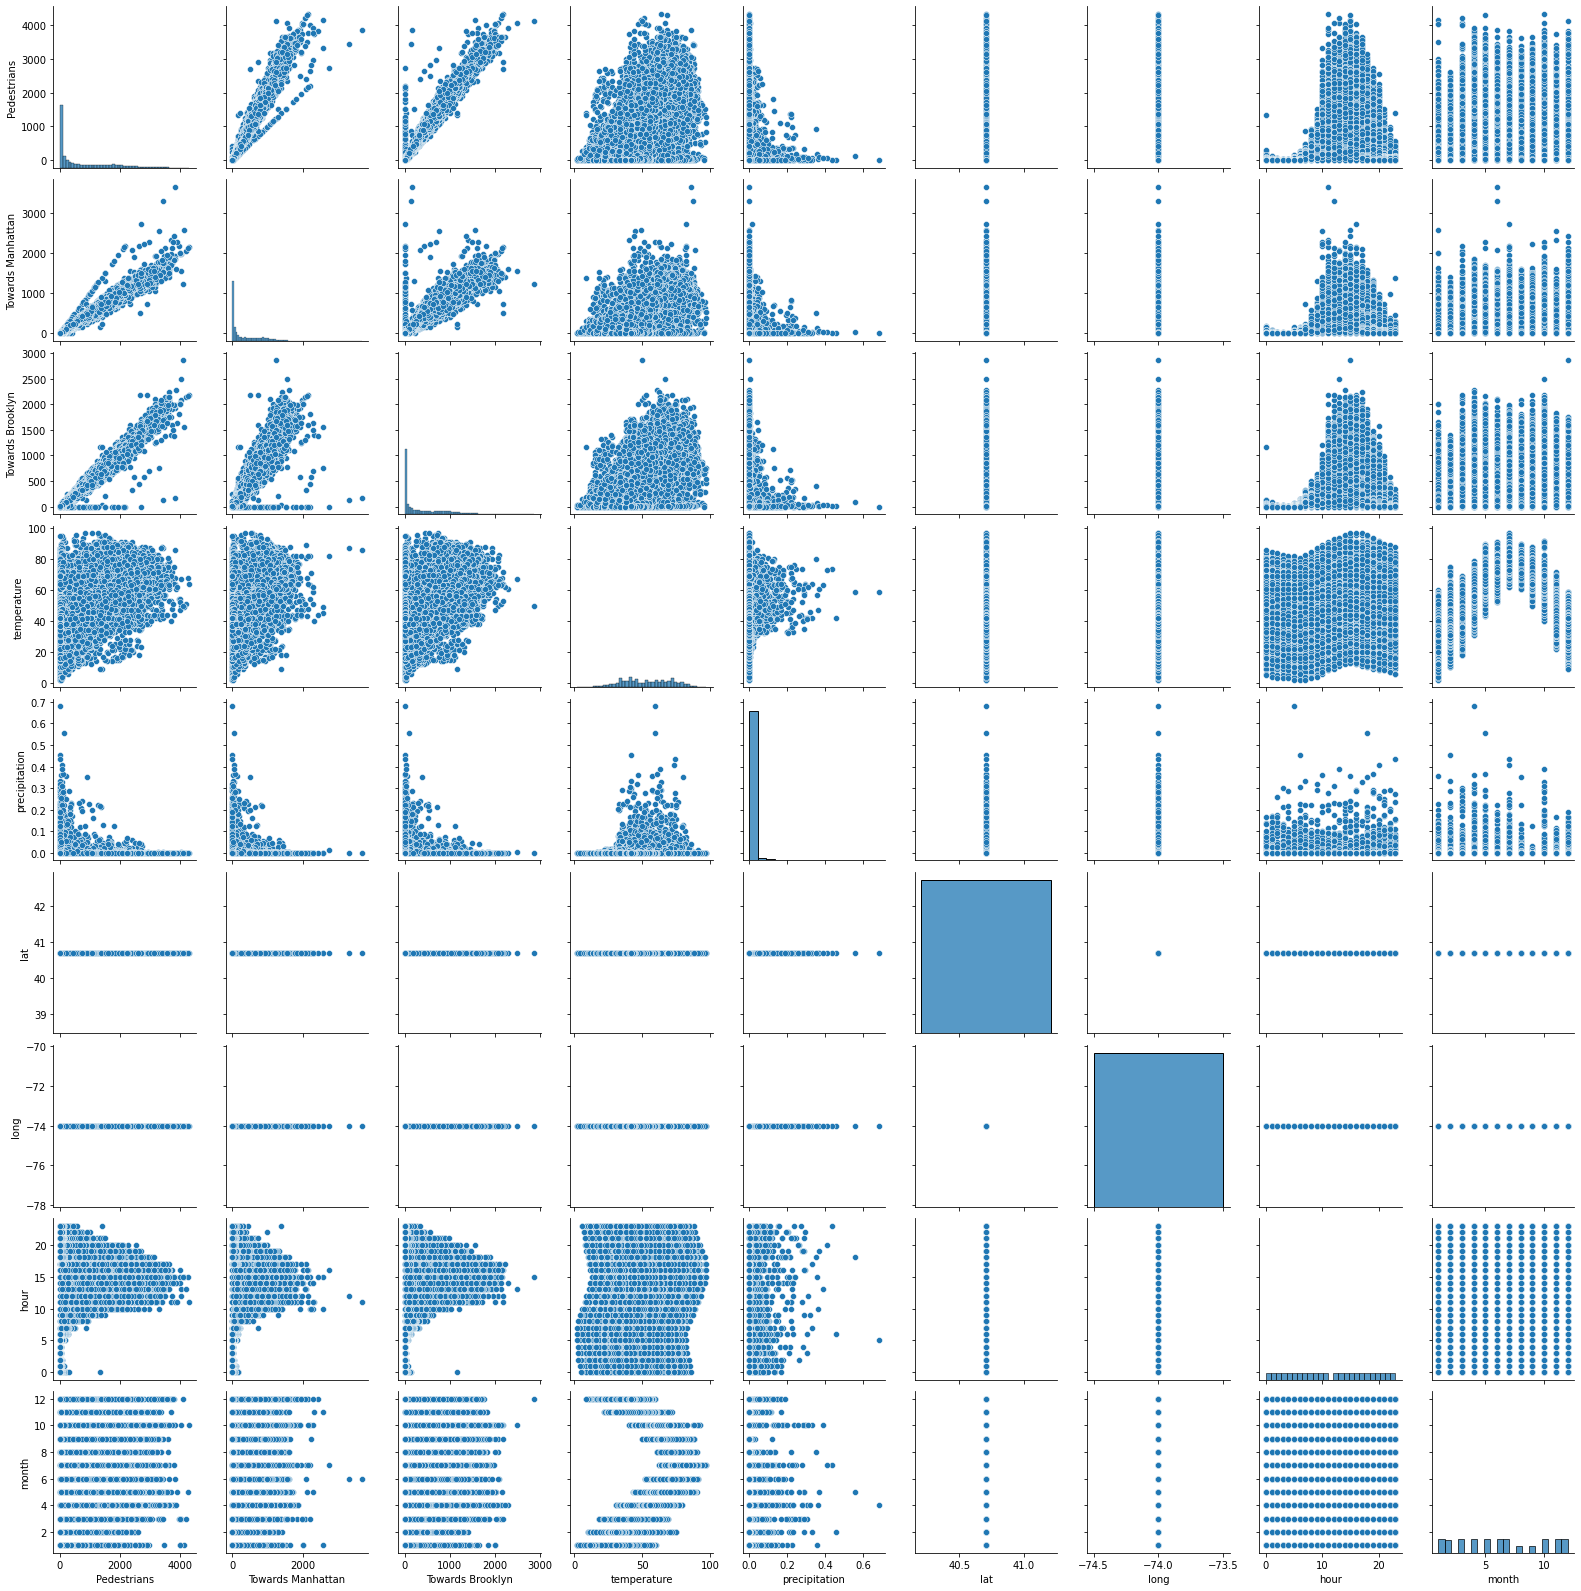

In [ ]:
sns.pairplot(df)

As we can see, it is difficult to see anything useful because there is so much going on in this plot. We can imporve these by -

- Dropping `lat` and `long`
- Making the points on the plot smaller and partially transparent, to help with the overplotting

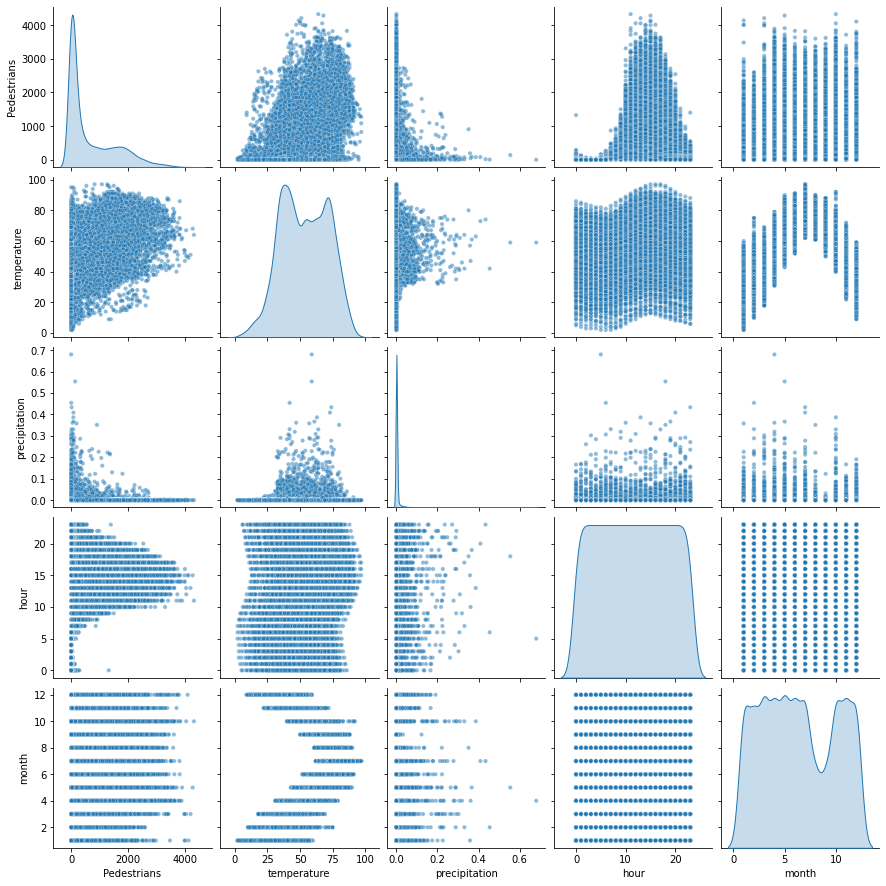

In [ ]:
sns.pairplot(df, vars=['Pedestrians', 'temperature', 'precipitation', 'hour', 'month'],
             diag_kind = 'kde',
             plot_kws={'alpha': 0.5, 'size': 0.1})

### Summary statistics

Now, we are ready to explore summary statistics. The “five number
summary” - extremes (min and max), median, and quartiles -can help us
gain a better understanding of the data. We can use the `describe`
function in `pandas` to compute this summary.

In [ ]:
df.describe()

,Pedestrians,Towards Manhattan,Towards Brooklyn,temperature,precipitation,lat,long,hour,month
count,16057.000000,16057.000000,16057.000000,16057.000000,16057.000000,1.605700e+04,1.605700e+04,16057.000000,16057.000000
mean,687.106309,334.772436,352.286853,53.205892,0.004613,4.070816e+01,-7.399951e+01,11.499346,6.347076
std,862.244605,417.807545,456.624509,18.036476,0.023389,5.762681e-12,1.125535e-11,6.922682,3.544812
min,0.000000,0.000000,0.000000,2.000000,0.000000,4.070816e+01,-7.399951e+01,0.000000,1.000000
25%,16.000000,9.000000,5.000000,39.000000,0.000000,4.070816e+01,-7.399951e+01,5.000000,3.000000
50%,227.000000,112.000000,111.000000,53.000000,0.000000,4.070816e+01,-7.399951e+01,11.000000,6.000000
75%,1254.000000,611.000000,632.000000,69.000000,0.000000,4.070816e+01,-7.399951e+01,17.000000,10.000000
max,4330.000000,3657.000000,2872.000000,97.000000,0.680400,4.070816e+01,-7.399951e+01,23.000000,12.000000


We are particularly interested in `Pedestrians`, the target variable

In [ ]:
df['Pedestrians'].describe()

count    16057.000000
mean       687.106309
std        862.244605
min          0.000000
25%         16.000000
50%        227.000000
75%       1254.000000
max       4330.000000
Name: Pedestrians, dtype: float64

For categorical variables, we can use `groupby` to get the usedful summary statistics

In [ ]:
df.groupby('weather_summary')['Pedestrians'].describe()

,count,mean,std,min,25%,50%,75%,max
weather_summary,,,,,,,,
clear-day,3127.0,1386.569875,861.890079,0.0,611.50,1401.0,1982.5,4330.0
clear-night,3755.0,102.689214,206.438992,0.0,2.00,19.0,93.5,1779.0
cloudy,2383.0,540.437684,727.986539,0.0,9.00,141.0,944.5,3894.0
fog,76.0,234.473684,307.735795,0.0,15.00,110.0,276.5,1321.0
partly-cloudy-day,3169.0,1422.154307,844.930127,0.0,699.00,1433.0,2008.0,4286.0
partly-cloudy-night,2508.0,93.880383,173.265652,0.0,3.00,23.0,97.0,1522.0
rain,920.0,256.165217,421.571020,0.0,10.00,67.5,311.0,2727.0
sleet,14.0,117.928571,157.850204,0.0,7.25,28.0,254.5,404.0
snow,93.0,195.473118,292.630818,0.0,16.00,77.0,258.0,1561.0


Another relation can be `events` and Pedestrians

In [ ]:
df.groupby('events')['Pedestrians'].describe()

,count,mean,std,min,25%,50%,75%,max
events,,,,,,,,
Black Friday,48.0,723.583333,952.014814,0.0,4.00,172.5,1515.50,2913.0
Christmas Day,48.0,832.312500,1199.381546,0.0,6.00,82.5,1480.75,3807.0
Christmas Eve,48.0,705.520833,945.112444,0.0,10.75,113.0,1406.50,2625.0
Cinco de Mayo,48.0,807.750000,1047.286392,3.0,64.25,408.5,848.25,3390.0
Columbus Day (regional holiday),44.0,694.181818,854.264712,0.0,28.75,332.0,878.75,2587.0
Daylight Saving Time ends,48.0,548.687500,719.950003,0.0,14.75,170.0,983.00,2311.0
Daylight Saving Time starts,48.0,504.500000,708.192515,0.0,10.00,123.5,814.25,2232.0
Easter Monday,24.0,581.916667,704.003515,0.0,15.25,380.5,850.25,2242.0
Easter Sunday,48.0,1321.812500,1443.738832,0.0,55.00,410.5,2809.50,3894.0


In [ ]:
df.groupby('events').agg({'Pedestrians':'sum'})

,Pedestrians
events,
Black Friday,34732
Christmas Day,39951
Christmas Eve,33865
Cinco de Mayo,38772
Columbus Day (regional holiday),30544
Daylight Saving Time ends,26337
Daylight Saving Time starts,24216
Easter Monday,13966
Easter Sunday,63447


### Explore relationships and look for issues

Finally, let’s further explore relationships between likely predictors
and our target variable.

Grouping day_name and Pedestrians

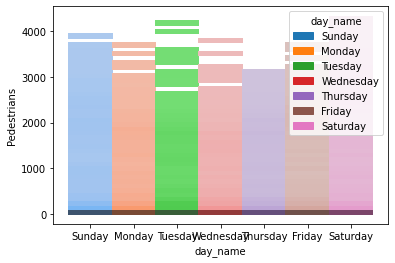

In [ ]:
sns.histplot(x='day_name', y='Pedestrians', data=df, hue='day_name')

In [ ]:
df.groupby('day_name').agg({'Pedestrians':'sum'})

,Pedestrians
day_name,
Friday,1588068
Monday,1481435
Saturday,2150464
Sunday,1736156
Thursday,1370880
Tuesday,1394963
Wednesday,1310900


Relating temperature and Pedestrians

In [ ]:
df.groupby('temperature')['Pedestrians'].sum()

temperature
2.0       58
3.0       64
4.0      219
5.0      100
6.0      542
        ... 
93.0    3814
94.0    4143
95.0    1430
96.0    4646
97.0    3191
Name: Pedestrians, Length: 96, dtype: int64

In [ ]:
df.groupby('temperature').agg({'Pedestrians':'sum'})

,Pedestrians
temperature,
2.0,58
3.0,64
4.0,219
5.0,100
6.0,542
...,...
93.0,3814
94.0,4143
95.0,1430


Precipitation and Pedestrians

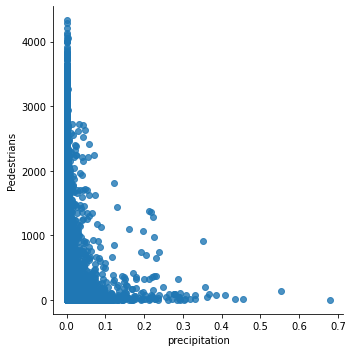

In [ ]:
sns.lmplot(x='precipitation', y='Pedestrians', data=df, fit_reg=False)

In [ ]:
df.groupby('precipitation').agg({'Pedestrians':'sum'})

,Pedestrians
precipitation,
0.0000,9021340
0.0001,124070
0.0002,168706
0.0003,108578
0.0004,93243
...,...
0.4090,81
0.4340,18
0.4543,6


Plotting it

### Observations

- New Yorkers love walking around when the weather has lower precipitation.
- Everybody loves going to the Bridge on the weekend.
- Nobody likes extreme weather (too hot or too cold).
- Easter Sunday is the most popular outdoors-ey event for New Yorkers.
- More people walk in between 10 AM - 8 PM (Ideally Rush hour or tourists).


## Additional topics for Practice

In preparation for the live meeting, consider the following machine
learning tasks, and candidate data sets. Try applying the first step of
our “recipe” - learn about the data - to these examples. Do these data
sets seem appropriate for the task? Without an in-depth analysis, can
you identify any important limitations of the datasets, or problems that
need addressing before we use them to train a machine learning model?

#### Satirical headline classification:

You are hired by a major social media platform to develop a machine
learning model that will be used to clearly mark *satirical news
articles* when they are shared on social media. You consider using this
dataset of 9,000 headlines from [The Onion](https://www.theonion.com/)
and 15,000 headlines from [Not The Onion on
Reddit](https://www.reddit.com/r/nottheonion/). [Link to OnionOrNot
data](https://github.com/lukefeilberg/onion)

#### Chest X-ray classification:

You are working for a large hospital system to develop a machine
learning model that, given a chest X-ray, should identify those that
likely have COVID-19 so that they can take proper precautions against
the spread of infection within the hospital. You consider using a two
datasets together: one with several hundred images of chest X-rays of
likely COVID-19 patients, and a pre-COVID dataset of chest X-ray images.
[Link to COVID-19 chest X-ray
data](https://github.com/ieee8023/covid-chestxray-dataset), [Link to
pre-COVID chest X-ray
data](https://www.kaggle.com/c/rsna-pneumonia-detection-challenge/overview)

#### Taxi tip prediction:

You are developing an app for NYC taxi drivers that will predict what
the typical tip would be for a given fare. You consider using data
collected by the NYC Taxi and Limousine Commission on taxi trips. The
links are for 2019 data, but previous years are also available. [Data
link for yellow (Manhattan) taxi
trips](https://data.cityofnewyork.us/Transportation/2019-Yellow-Taxi-Trip-Data/2upf-qytp)
and [data link for green (non-Manhattan) taxi
trips](https://data.cityofnewyork.us/Transportation/2019-Green-Taxi-Trip-Data/q5mz-t52e)

#### Highway traffic prediction:

You are working for the state of New York to develop a traffic
prediction model for the NYS Thruway. The following Thruway data is
available: Number and types of vehicles that entered from each entry
point on the Thruway, along with their exit points, at 15 minute
intervals. The link points to the most recent week’s worth of available
data, but this data is available through 2014. [Link to NYS Thruway
data](https://data.ny.gov/Transportation/NYS-Thruway-Origin-and-Destination-Points-for-All-/4dbf-24u2)

#### Offensive post classification:

The social media platform was so impressed with your work on detection
of satirical headlines, that they asked you to work on a model to
identify posts using offensive language. As training data, they hand you
80,000 tweets, labeled as either “hateful”, “abusive”, “spam”, or
“none”, by majority vote of five people. [Link to abusive tweets
data](https://dataverse.mpi-sws.org/dataset.xhtml?persistentId=doi:10.5072/FK2/ZDTEMN)